# Project Discription
Build a classification model to predict whether an email is spam
or not based on its content.

# Email Classification

![Spam Classification]( https://www.codecentric.de/_next/image?url=https%3A%2F%2Fmedia.graphassets.com%2Foutput%3Dformat%3Awebp%2F0ea6iSnqQTm8OsjOrdqL&w=1920&q=75)


# Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb 

import string
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics  import confusion_matrix ,accuracy_score,f1_score,jaccard_score,log_loss ,classification_report,ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler


# Wrangle Function
In this function we apply all Data preprocessing Techniques and dealing with data problems

In [2]:
def wrangle(path):
    # read the data
    df = pd.read_csv(path,encoding='latin-1')
    # remove unused features
    df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)
    # convert target into 0,1 (labeled)
    df['v1'] = df['v1'].replace(['ham','spam'],[0,1]) 
    # make features easy to understand 
    df.rename(columns={'v1': 'Email Type','v2':'Email'}, inplace=True)
    ps = PorterStemmer()
    # preprocess the data by tokenizing, removing stop words, and performing stemming
    emails = []
    for i in range(len(df)) :
        email = re.sub('[^a-zA-Z]'," ",df['Email'][i])
        email = email.lower()
        email = email.split()
        email = [word for word in email if word not in stopwords.words('english')]
        email = ' '.join(email)
        email = ps.stem(email)
        emails.append(email) 
    # add new feature for emails after preprocessing    
    df['Email After Preprocessing'] = emails
     
    return df

In [3]:
df = wrangle('D:\\TeknoSoft Internship\\INTERMEDIATE LEVEL TASK\\Dataset\\SMS Spam Collection\\spam.csv')

In [4]:
df

,Email Type,Email,Email After Preprocessing
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,nd time tried contact u u pound prize claim ea...
5568,0,Will Ì_ b going to esplanade fr home?,b going esplanade fr hom
5569,0,"Pity, * was in mood for that. So...any other s...",pity mood suggest
5570,0,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


In [5]:
df.head()

,Email Type,Email,Email After Preprocessing
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [6]:
df.tail()

,Email Type,Email,Email After Preprocessing
5567,1,This is the 2nd time we have tried 2 contact u...,nd time tried contact u u pound prize claim ea...
5568,0,Will Ì_ b going to esplanade fr home?,b going esplanade fr hom
5569,0,"Pity, * was in mood for that. So...any other s...",pity mood suggest
5570,0,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...
5571,0,Rofl. Its true to its name,rofl true nam


In [7]:
# there are no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Email Type                 5572 non-null   int64 
 1   Email                      5572 non-null   object
 2   Email After Preprocessing  5572 non-null   object
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


# Email Before and After Preprocessing

In [242]:
def show_the_difference(i):
    
    col1 = df['Email']
    col2 = df['Email After Preprocessing']
    
    print(f'Email number {i} before preprocessing: [{col1[i]}]\n')
    print(f'Email number {i} after preprocessing: [{col2[i]}]')  
    
show_the_difference(90)

Email number 90 before preprocessing: [Yeah do! DonÛ÷t stand to close tho- youÛ÷ll catch something!]

Email number 90 after preprocessing: [yeah stand close tho catch someth]


# Target Distribution

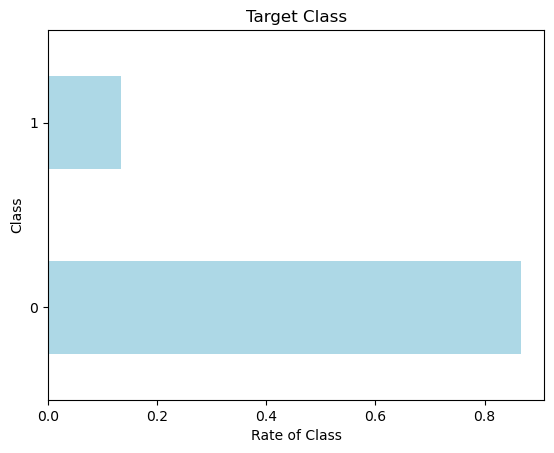

In [9]:
df['Email Type'].value_counts(normalize=True).plot(kind = "barh" , color = "lightblue")
plt.xlabel('Rate of Class')
plt.ylabel('Class')
plt.title('Target Class');

# Data Preparation for Model Building

In [84]:
# prepare features and target
X = df[['Email After Preprocessing']]
y = df['Email Type']

# convert features into numerical 
cv = CountVectorizer()
X = cv.fit_transform(X['Email After Preprocessing']).toarray()
print(f'The shape of the features: {X.shape}')
print(f'The shape of the traget: {y.shape}')
print('--------------------------------------')
# split data
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.33 , random_state=42)
print(f'The shape of training set\nFeatures:{X_train.shape}\nTarget:{y_train.shape}')
print('--------------------------------------')
print(f'The shape of test set\nFeatures:{X_test.shape}\nTarget:{y_test.shape}')


The shape of the features: (5572, 7834)
The shape of the traget: (5572,)
--------------------------------------
The shape of training set
Features:(3733, 7834)
Target:(3733,)
--------------------------------------
The shape of test set
Features:(1839, 7834)
Target:(1839,)


# Multinomial Naive Bayes Model

In [85]:
clf = MultinomialNB()
clf.fit(X_train , y_train)

MultinomialNB()

In [86]:
y_predict_clf = clf.predict(X_test)
y_predict_clf

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [87]:
acc_train_clf = accuracy_score(y_train,clf.predict(X_train))
acc_test_clf = clf.score(X_test,y_test)

print("Training Accuracy:",  acc_train_clf)
print("Test Accuracy:", acc_test_clf)

Training Accuracy: 0.994374497723011
Test Accuracy: 0.9738988580750407


In [88]:
# Evaluate the model
accuracy_clf = accuracy_score(y_test, y_predict_clf)
report_clf = classification_report(y_test, y_predict_clf)

print(f'Accuracy: {accuracy_clf:.2f}')
print('Classification Report:\n', report_clf)

Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1587
           1       0.90      0.92      0.91       252

    accuracy                           0.97      1839
   macro avg       0.94      0.95      0.95      1839
weighted avg       0.97      0.97      0.97      1839



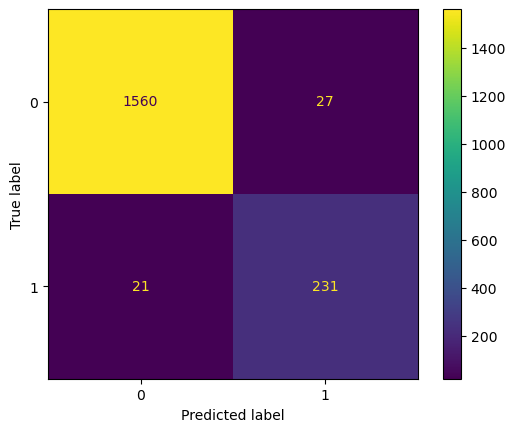

In [89]:
ConfusionMatrixDisplay.from_estimator(clf,X_test ,y_test);

# Support Vector Machine (SVM) Model

In [90]:
# Train the SVM model
SVM_model = SVC()  # You can try different degrees
SVM_model.fit(X_train, y_train)

SVC()

In [91]:
y_predict_svm = SVM_model.predict(X_test)

In [92]:
traning_score_svm = SVM_model.score(X_train,y_train)
test_score_svm = SVM_model.score(X_test,y_test)

print("traning_score : " ,traning_score_svm)
print("test_score : " ,test_score_svm)

traning_score :  0.996517546209483
test_score :  0.9744426318651441


In [93]:
# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_predict_svm)
report_svm = classification_report(y_test, y_predict_svm)

print(f'Accuracy: {accuracy_svm:.2f}')
print('Classification Report:\n', report_svm)

Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1587
           1       1.00      0.81      0.90       252

    accuracy                           0.97      1839
   macro avg       0.99      0.91      0.94      1839
weighted avg       0.98      0.97      0.97      1839



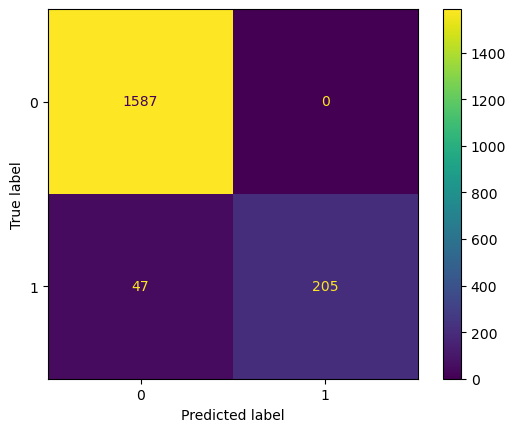

In [94]:
ConfusionMatrixDisplay.from_estimator(SVM_model,X_test ,y_test);

# Random oversamplig to balance the target class


In [95]:
# prepare features and target
X = df[['Email After Preprocessing']]
y = df['Email Type']

# random over sampling
R_over_sample = RandomOverSampler(random_state=42)
X_oversample, y_oversample = R_over_sample.fit_resample(X , y)

print(f'After Oversampling\nfeatures shape: {X_oversample.shape}\ntarget sahpe: {y_oversample.shape}')

After Oversampling
features shape: (9650, 1)
target sahpe: (9650,)


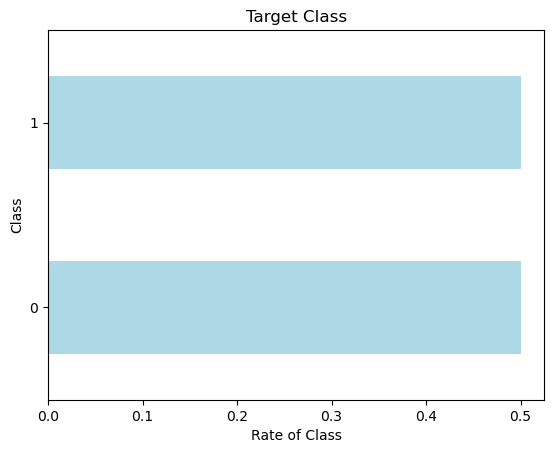

In [96]:
y_oversample.value_counts(normalize=True).plot(kind = "barh" , color = "lightblue")
plt.xlabel('Rate of Class')
plt.ylabel('Class')
plt.title('Target Class');

In [98]:
# convert features into numerical 
cv = CountVectorizer()
X_oversample = cv.fit_transform(X_oversample['Email After Preprocessing']).toarray()
print('Using Oversampling Technique to balance the target calss')
print(f'The shape of the features: {X_oversample.shape}')
print(f'The shape of the traget: {y_oversample.shape}')
print('--------------------------------------')
# split data
X_oversample_train, X_oversample_test, y_oversample_train, y_oversample_test = train_test_split(X_oversample ,
                                                                            y_oversample , test_size=0.33 , random_state=42)
print(f'The shape of training set\nFeatures:{X_oversample_train.shape}\nTarget:{y_oversample_train.shape}')
print('--------------------------------------')
print(f'The shape of test set\nFeatures:{X_oversample_test.shape}\nTarget:{y_oversample_test.shape}')
 

Using Oversampling Technique to balance the target calss
The shape of the features: (9650, 7834)
The shape of the traget: (9650,)
--------------------------------------
The shape of training set
Features:(6465, 7834)
Target:(6465,)
--------------------------------------
The shape of test set
Features:(3185, 7834)
Target:(3185,)


# Multinomial Naive Bayes Model With Random-oversampling

In [100]:
clf_oversample = MultinomialNB()
clf_oversample.fit(X_oversample_train , y_oversample_train)

MultinomialNB()

In [101]:
y_pred_clf_oversample = clf.predict(X_oversample_test)
y_pred_clf_oversample

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [102]:
acc_train_clf_oversample = accuracy_score(y_oversample_train,clf.predict(X_oversample_train))
acc_test_clf_oversample = clf.score(X_oversample_test,y_oversample_test)

print("Training Accuracy:",  acc_train_clf_oversample)
print("Test Accuracy:", acc_test_clf_oversample)

Training Accuracy: 0.9766434648105182
Test Accuracy: 0.9726844583987441


In [104]:
# Evaluate the model
accuracy_clf_oversample = accuracy_score(y_oversample_test, y_pred_clf_oversample)
report_clf_oversample = classification_report(y_oversample_test, y_pred_clf_oversample)

print(f'Accuracy: {accuracy_clf_oversample:.2f}')
print('Classification Report:\n', report_clf_oversample)

Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1608
           1       0.99      0.96      0.97      1577

    accuracy                           0.97      3185
   macro avg       0.97      0.97      0.97      3185
weighted avg       0.97      0.97      0.97      3185



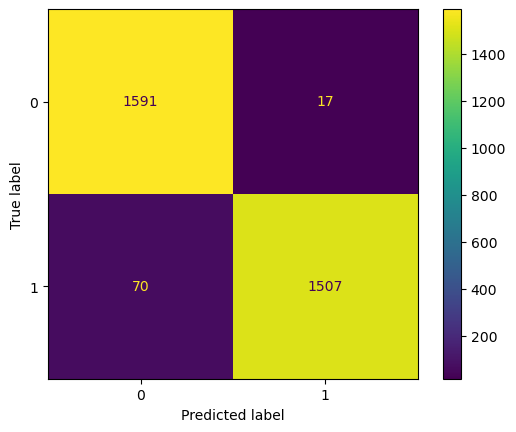

In [105]:
ConfusionMatrixDisplay.from_estimator(clf,X_oversample_test ,y_oversample_test);

#  SVM Model With Random-oversampling

In [112]:
# Train the SVM model
SVM_model_oversample = SVC()  # You can try different degrees
SVM_model_oversample.fit(X_oversample_train, y_oversample_train)

SVC()

In [113]:
y_pred_svm_oversample = SVM_model_oversample.predict(X_oversample_test)

In [114]:
traning_score_svm_oversample = SVM_model_oversample.score(X_oversample_train,y_oversample_train)
test_score_svm_oversample = SVM_model_oversample.score(X_oversample_test,y_oversample_test)

print("traning_score : " ,traning_score_svm_oversample)
print("test_score : " ,test_score_svm_oversample)

traning_score :  0.9976798143851509
test_score :  0.9927786499215071


In [115]:
# Evaluate the model
accuracy_svm_oversample = accuracy_score(y_oversample_test, y_pred_svm_oversample)
report_svm_oversample = classification_report(y_oversample_test, y_pred_svm_oversample)

print(f'Accuracy: {accuracy_svm_oversample:.2f}')
print('Classification Report:\n', report_svm_oversample)

Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1608
           1       1.00      0.99      0.99      1577

    accuracy                           0.99      3185
   macro avg       0.99      0.99      0.99      3185
weighted avg       0.99      0.99      0.99      3185



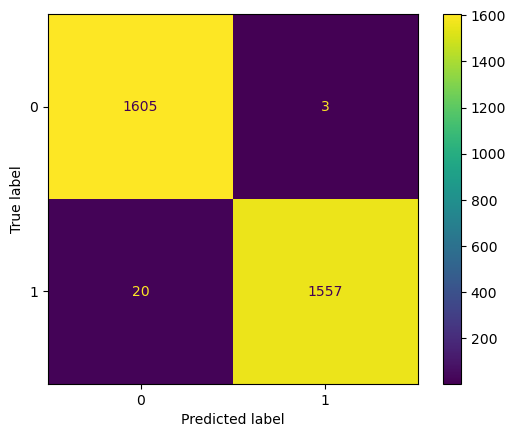

In [116]:
ConfusionMatrixDisplay.from_estimator(SVM_model_oversample,X_oversample_test ,y_oversample_test);

# Models Performance

In [132]:
accuracy_scores = [accuracy_clf,accuracy_svm]
f1_scores = [f1_score(y_test, y_predict_clf),f1_score(y_test, y_predict_svm)]

accuracy_scores_oversample = [accuracy_clf_oversample,accuracy_svm_oversample]
f1_scores_oversample = [f1_score(y_oversample_test, y_pred_clf_oversample),
                        f1_score(y_oversample_test, y_pred_svm_oversample)]



In [212]:
model_performances = {'Model':['Multinomial Naive Bayes','Support Vector Machine'],
                      'Accuracy Without Oversampling'
 :accuracy_scores,'Fi Score Without Oversampling':
 f1_scores,'Accuracy With Oversampling'
 :accuracy_scores_oversample,
 'Fi Score With Oversampling':f1_scores_oversample}

model_performances = pd.DataFrame(model_performances,index =['Multinomial Naive Bayes','Support Vector Machine'])

In [213]:
model_performances

,Model,Accuracy Without Oversampling,Fi Score Without Oversampling,Accuracy With Oversampling,Fi Score With Oversampling
Multinomial Naive Bayes,Multinomial Naive Bayes,0.973899,0.905882,0.972684,0.971945
Support Vector Machine,Support Vector Machine,0.974443,0.897155,0.992779,0.992668


# Models Comparison

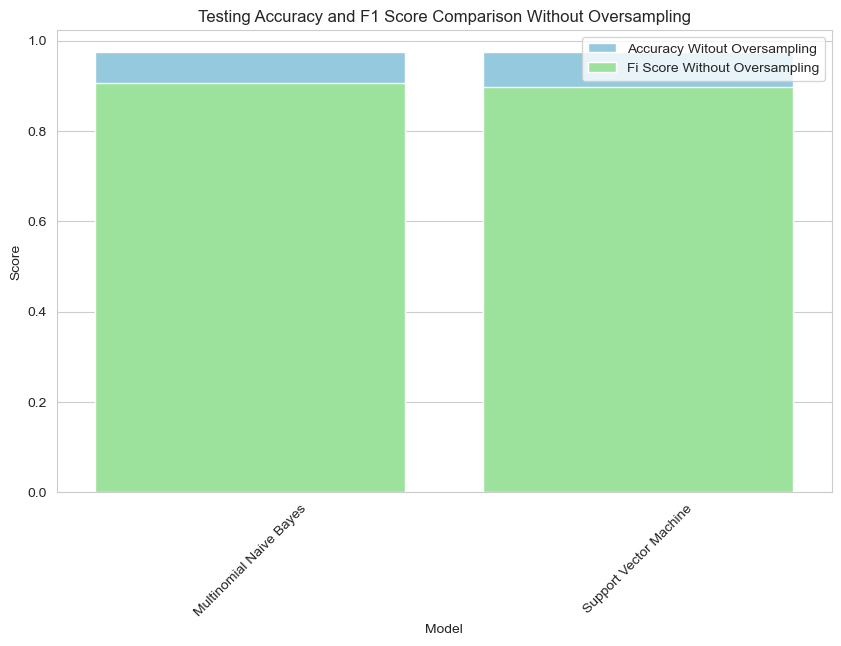

In [237]:
sb.set_style('whitegrid')  # Set the plot style to whitegrid
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the accuracy bar plot
sb.barplot(x='Model', y='Accuracy Without Oversampling', data=model_performances, color='skyblue',label = 'Accuracy Witout Oversampling')
# Plot the F1 score bar plot
sb.barplot(x='Model', y='Fi Score Without Oversampling', data=model_performances, color='lightgreen', label='Fi Score Without Oversampling')
 
plt.xlabel('Model')  # Set the x-axis label
plt.ylabel('Score')  # Set the y-axis label

plt.title('Testing Accuracy and F1 Score Comparison Without Oversampling')
plt.legend()  # Show the legend
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()  # Display the plot

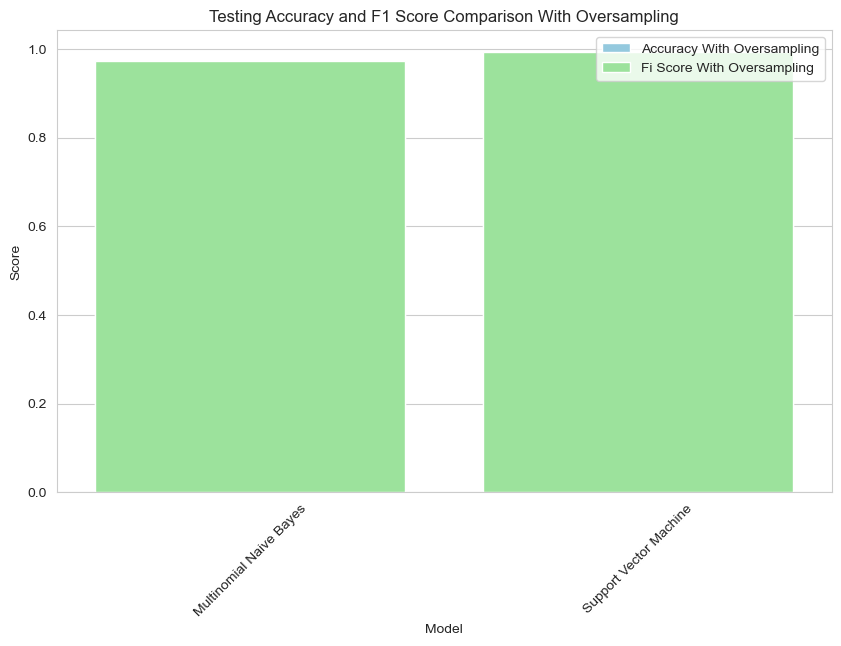

In [238]:
sb.set_style('whitegrid')   
plt.figure(figsize=(10, 6))  

# Plot the accuracy bar plot
sb.barplot(x='Model', y='Accuracy With Oversampling', data=model_performances, color='skyblue',label = 'Accuracy With Oversampling')
# Plot the F1 score bar plot
sb.barplot(x='Model', y='Fi Score With Oversampling', data=model_performances, color='lightgreen',
           label='Fi Score With Oversampling')

plt.xlabel('Model')   
plt.ylabel('Score')   

plt.title('Testing Accuracy and F1 Score Comparison With Oversampling')
# Set the plot title
plt.legend()   
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()  

# Champion Model

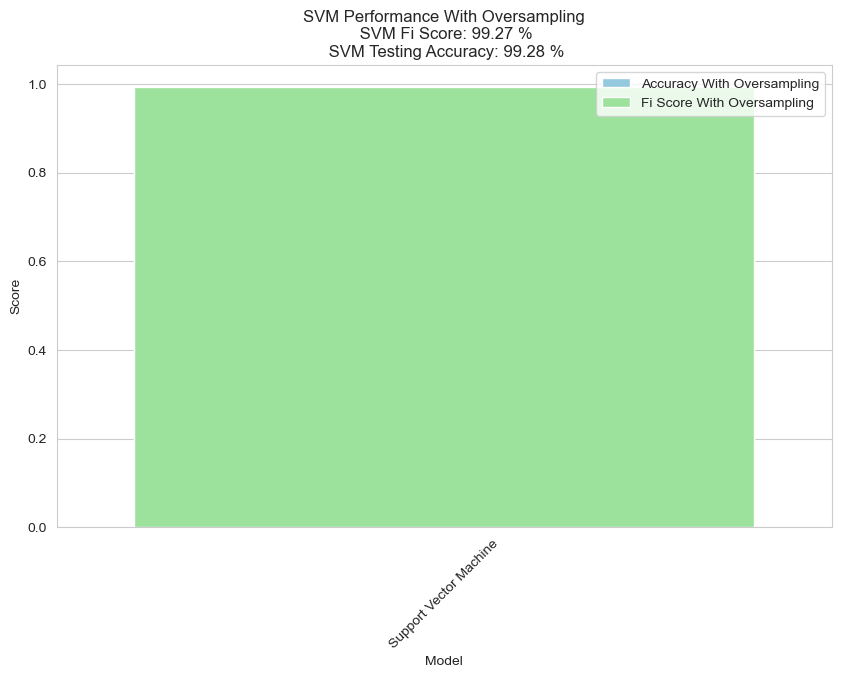

In [240]:
svm_performance = model_performances[model_performances['Model'] == 'Support Vector Machine']

sb.set_style('whitegrid')
plt.figure(figsize=(10, 6))

# Plot the accuracy bar plot
sb.barplot(x='Model', y='Accuracy With Oversampling', data=svm_performance, color='skyblue', label='Accuracy With Oversampling')

# Plot the F1 score bar plot
sb.barplot(x='Model', y='Fi Score With Oversampling', data=svm_performance, color='lightgreen', label='Fi Score With Oversampling')

plt.xlabel('Model')
plt.ylabel('Score')

accuracy = round((svm_performance['Accuracy With Oversampling']['Support Vector Machine'] * 100),2)
fi = round((svm_performance['Fi Score With Oversampling']['Support Vector Machine'] * 100),2)

plt.title(f'SVM Performance With Oversampling\n SVM Fi Score: {fi} %\n SVM Testing Accuracy: {accuracy} %',fontsize = 12)

plt.legend()
plt.xticks(rotation=45)
plt.show()